In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\uma karthikeyua\Downloads\laptops_4.csv")

In [3]:
df.head()

,product name,Price,ratings,Features,Page number,Original_price,Discount,Review
0,DELL 15 AMD Ryzen 5 Hexa Core 7530U - (16 GB/5...,"₹38,990",4.3,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,1,"₹56,919",31% off,"2,013 Ratings & 135 Reviews"
1,DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...,"₹38,990",4.2,Intel Core i3 Processor (13th Gen)16 GB DDR4 R...,1,"₹54,479",28% off,399 Ratings & 30 Reviews
2,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹15,990",3.8,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,1,"₹32,990",51% off,"6,774 Ratings & 603 Reviews"
3,ASUS Expertbook P1 High-performance processor ...,"₹49,990",4.3,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,1,"₹89,990",44% off,"3,463 Ratings & 275 Reviews"
4,Lenovo Chromebook MediaTek Kompanio 520 - (4 G...,"₹12,990",3.9,MediaTek Kompanio 520 Processor4 GB LPDDR4X RA...,1,"₹28,690",54% off,"3,181 Ratings & 272 Reviews"


In [4]:
df.tail()

,product name,Price,ratings,Features,Page number,Original_price,Discount,Review
979,ASUS X512FA Intel Core i3 10th Gen - (4 GB/512...,"₹37,899",4.4,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,41,"₹40,870",7% off,851 Ratings & 154 Reviews
980,HP Laptop Intel Core i3 13th Gen 1315U - (8 GB...,"₹35,990",4.1,Intel Core i3 Processor (13th Gen)8 GB DDR4 RA...,41,"₹52,115",30% off,"2,057 Ratings & 125 Reviews"
981,DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...,"₹38,990",4.2,Intel Core i3 Processor (13th Gen)16 GB DDR4 R...,41,"₹54,479",28% off,399 Ratings & 30 Reviews
982,HP Pavilion Intel Core i5 12th Gen 1240P - (8 ...,"₹58,599",4.2,Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,41,"₹75,494",22% off,813 Ratings & 64 Reviews
983,HP 255 G9 Silver AMD Ryzen 5 Hexa Core AMD Ryz...,"₹36,990",4.1,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM32...,41,"₹54,000",31% off,249 Ratings & 19 Reviews


In [5]:
df.shape

(984, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product name    984 non-null    object 
 1   Price           984 non-null    object 
 2   ratings         951 non-null    float64
 3   Features        984 non-null    object 
 4   Page number     984 non-null    int64  
 5   Original_price  976 non-null    object 
 6   Discount        975 non-null    object 
 7   Review          951 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 61.6+ KB


In [7]:
df.isnull().sum()

product name       0
Price              0
ratings           33
Features           0
Page number        0
Original_price     8
Discount           9
Review            33
dtype: int64

In [8]:
df['ratings']

0      4.3
1      4.2
2      3.8
3      4.3
4      3.9
      ... 
979    4.4
980    4.1
981    4.2
982    4.2
983    4.1
Name: ratings, Length: 984, dtype: float64

In [9]:
df['ratings'].value_counts()

ratings
4.1    238
4.4    202
4.2    155
4.3    144
4.0     54
3.9     30
4.5     27
3.8     23
4.6     11
4.7     11
3.6     10
3.5      8
3.7      8
3.0      6
4.9      6
5.0      5
3.4      5
4.8      3
3.3      2
2.7      2
3.2      1
Name: count, dtype: int64

In [10]:
df['ratings'].fillna(df['ratings'].mode()[0],inplace = True)

In [11]:
df['Original_price'].fillna(df['Original_price'].mode()[0],inplace= True)

In [12]:
df['Discount'].fillna(df['Discount'].mode()[0],inplace=True)

In [13]:
df['Review'].fillna(df['Review'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

product name      0
Price             0
ratings           0
Features          0
Page number       0
Original_price    0
Discount          0
Review            0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(1)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.head()

,product name,Price,ratings,Features,Page number,Original_price,Discount,Review
0,DELL 15 AMD Ryzen 5 Hexa Core 7530U - (16 GB/5...,"₹38,990",4.3,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,1,"₹56,919",31% off,"2,013 Ratings & 135 Reviews"
1,DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...,"₹38,990",4.2,Intel Core i3 Processor (13th Gen)16 GB DDR4 R...,1,"₹54,479",28% off,399 Ratings & 30 Reviews
2,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹15,990",3.8,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,1,"₹32,990",51% off,"6,774 Ratings & 603 Reviews"
3,ASUS Expertbook P1 High-performance processor ...,"₹49,990",4.3,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,1,"₹89,990",44% off,"3,463 Ratings & 275 Reviews"
4,Lenovo Chromebook MediaTek Kompanio 520 - (4 G...,"₹12,990",3.9,MediaTek Kompanio 520 Processor4 GB LPDDR4X RA...,1,"₹28,690",54% off,"3,181 Ratings & 272 Reviews"


In [19]:
df['Brands']=df['product name'].apply(lambda x : re.findall(r'^\w+',x)[0])

In [20]:
df['Brands'].value_counts().head(10)

Brands
HP          251
ASUS        197
DELL        149
Lenovo      118
Acer        115
Samsung      62
MSI          42
Apple        13
MOTOROLA     11
Infinix       7
Name: count, dtype: int64

In [21]:
df['processor'] = df['Features'].apply(lambda x : re.findall(r'^\w+',x)[0])

In [22]:
df['processor'].value_counts()

processor
Intel         568
AMD           264
Qualcomm      128
Apple          13
MediaTek        8
Snapdragon      1
Processor       1
Name: count, dtype: int64

In [23]:
df.head()

,product name,Price,ratings,Features,Page number,Original_price,Discount,Review,Brands,processor
0,DELL 15 AMD Ryzen 5 Hexa Core 7530U - (16 GB/5...,"₹38,990",4.3,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,1,"₹56,919",31% off,"2,013 Ratings & 135 Reviews",DELL,AMD
1,DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...,"₹38,990",4.2,Intel Core i3 Processor (13th Gen)16 GB DDR4 R...,1,"₹54,479",28% off,399 Ratings & 30 Reviews,DELL,Intel
2,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹15,990",3.8,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,1,"₹32,990",51% off,"6,774 Ratings & 603 Reviews",Acer,Intel
3,ASUS Expertbook P1 High-performance processor ...,"₹49,990",4.3,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,1,"₹89,990",44% off,"3,463 Ratings & 275 Reviews",ASUS,Intel
4,Lenovo Chromebook MediaTek Kompanio 520 - (4 G...,"₹12,990",3.9,MediaTek Kompanio 520 Processor4 GB LPDDR4X RA...,1,"₹28,690",54% off,"3,181 Ratings & 272 Reviews",Lenovo,MediaTek


In [24]:
df['ratings1']=df['Review'].apply(lambda x : re.split(r'[&]',x)[0])

In [25]:
df['number_of_ratings'] = df['ratings1'].apply(lambda x : re.findall(r'[\d,]+',x)[0].replace(',','')).astype('int')

In [26]:
df['review1']  = df['Review'].apply(lambda x : re.split(r'[&]',x)[1])

In [27]:
df['number_of_reviews'] = df['review1'].apply(lambda x : re.findall(r'[\d,]+',x)[-1].replace(',','')).astype('int')

In [28]:
df['number_of_ratings']

0      2013
1       399
2      6774
3      3463
4      3181
       ... 
979     851
980    2057
981     399
982     813
983     249
Name: number_of_ratings, Length: 983, dtype: int64

In [42]:
df['Price']=df['Price'].apply(lambda x : re.sub(r'[₹,]','',x)).astype('int64')

In [30]:
df['Original_price'].apply(lambda x : re.sub(r'[₹,]','',x)).astype('int64')

0      56919
1      54479
2      32990
3      89990
4      28690
       ...  
979    40870
980    52115
981    54479
982    75494
983    54000
Name: Original_price, Length: 983, dtype: int64

In [31]:
 df['number_of_reviews']

0      135
1       30
2      603
3      275
4      272
      ... 
979    154
980    125
981     30
982     64
983     19
Name: number_of_reviews, Length: 983, dtype: int64

In [32]:
df["Features"]

0      AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...
1      Intel Core i3 Processor (13th Gen)16 GB DDR4 R...
2      Intel Celeron Dual Core Processor8 GB DDR4 RAM...
3      Intel Core i5 Processor (13th Gen)16 GB DDR5 R...
4      MediaTek Kompanio 520 Processor4 GB LPDDR4X RA...
                             ...                        
979    Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...
980    Intel Core i3 Processor (13th Gen)8 GB DDR4 RA...
981    Intel Core i3 Processor (13th Gen)16 GB DDR4 R...
982    Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...
983    AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM32...
Name: Features, Length: 983, dtype: object

In [34]:
df["GB_List"]=df["Features"].apply(lambda x:re.findall(r"(\d+)\s*GB",x))

In [35]:
df["GB_List"]

0      [16, 512]
1      [16, 512]
2       [8, 128]
3      [16, 512]
4            [4]
         ...    
979     [4, 512]
980     [8, 512]
981    [16, 512]
982     [8, 512]
983     [8, 512]
Name: GB_List, Length: 983, dtype: object

In [36]:
df["RAM"]=df["GB_List"].apply(lambda x:x[0] if len(x)>0 else np.nan).astype("int64")
                                                                            

In [37]:
df["RAM"]

0      16
1      16
2       8
3      16
4       4
       ..
979     4
980     8
981    16
982     8
983     8
Name: RAM, Length: 983, dtype: int64

In [38]:
df["Storage"]=df["GB_List"].apply(lambda x:x[1] if len(x)>1 else np.nan)

In [39]:
df["Storage"].isnull().sum()

np.int64(106)

In [40]:
df["Storage"].findall(df["Storage"].mode()[0],inplace=True)

AttributeError: 'Series' object has no attribute 'findall'

In [ ]:
df["Discount"]=df["Discount"].apply(lambda x:re.findall(r"[\d%

In [ ]:
df.drop(columns={

In [43]:
df

,product name,Price,ratings,Features,Page number,Original_price,Discount,Review,Brands,processor,ratings1,number_of_ratings,review1,number_of_reviews,GB_List,RAM,Storage
0,DELL 15 AMD Ryzen 5 Hexa Core 7530U - (16 GB/5...,38990,4.3,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,1,"₹56,919",31% off,"2,013 Ratings & 135 Reviews",DELL,AMD,"2,013 Ratings",2013,135 Reviews,135,"[16, 512]",16,512
1,DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...,38990,4.2,Intel Core i3 Processor (13th Gen)16 GB DDR4 R...,1,"₹54,479",28% off,399 Ratings & 30 Reviews,DELL,Intel,399 Ratings,399,30 Reviews,30,"[16, 512]",16,512
2,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,15990,3.8,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,1,"₹32,990",51% off,"6,774 Ratings & 603 Reviews",Acer,Intel,"6,774 Ratings",6774,603 Reviews,603,"[8, 128]",8,128
3,ASUS Expertbook P1 High-performance processor ...,49990,4.3,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,1,"₹89,990",44% off,"3,463 Ratings & 275 Reviews",ASUS,Intel,"3,463 Ratings",3463,275 Reviews,275,"[16, 512]",16,512
4,Lenovo Chromebook MediaTek Kompanio 520 - (4 G...,12990,3.9,MediaTek Kompanio 520 Processor4 GB LPDDR4X RA...,1,"₹28,690",54% off,"3,181 Ratings & 272 Reviews",Lenovo,MediaTek,"3,181 Ratings",3181,272 Reviews,272,[4],4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,ASUS X512FA Intel Core i3 10th Gen - (4 GB/512...,37899,4.4,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,41,"₹40,870",7% off,851 Ratings & 154 Reviews,ASUS,Intel,851 Ratings,851,154 Reviews,154,"[4, 512]",4,512
980,HP Laptop Intel Core i3 13th Gen 1315U - (8 GB...,35990,4.1,Intel Core i3 Processor (13th Gen)8 GB DDR4 RA...,41,"₹52,115",30% off,"2,057 Ratings & 125 Reviews",HP,Intel,"2,057 Ratings",2057,125 Reviews,125,"[8, 512]",8,512
981,DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...,38990,4.2,Intel Core i3 Processor (13th Gen)16 GB DDR4 R...,41,"₹54,479",28% off,399 Ratings & 30 Reviews,DELL,Intel,399 Ratings,399,30 Reviews,30,"[16, 512]",16,512
982,HP Pavilion Intel Core i5 12th Gen 1240P - (8 ...,58599,4.2,Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,41,"₹75,494",22% off,813 Ratings & 64 Reviews,HP,Intel,813 Ratings,813,64 Reviews,64,"[8, 512]",8,512


In [44]:
df=pd.read_csv(r"C:\Users\uma karthikeyua\Downloads\cleaned_laptops.csv")

In [46]:
df

,Price,ratings,Page number,Original_price,Discount,Brands,processor,number_of_ratings,number_of_reviews,RAM,Storage
0,38990,4.3,1,56919,31%,DELL,AMD,2013,135,16,512
1,38990,4.2,1,54479,28%,DELL,Intel,399,30,16,512
2,15990,3.8,1,32990,51%,Acer,Intel,6774,603,8,128
3,49990,4.3,1,89990,44%,ASUS,Intel,3463,275,16,512
4,12990,3.9,1,28690,54%,Lenovo,MediaTek,3181,272,4,512
...,...,...,...,...,...,...,...,...,...,...,...
978,37899,4.4,41,40870,7%,ASUS,Intel,851,154,4,512
979,35990,4.1,41,52115,30%,HP,Intel,2057,125,8,512
980,38990,4.2,41,54479,28%,DELL,Intel,399,30,16,512
981,58599,4.2,41,75494,22%,HP,Intel,813,64,8,512


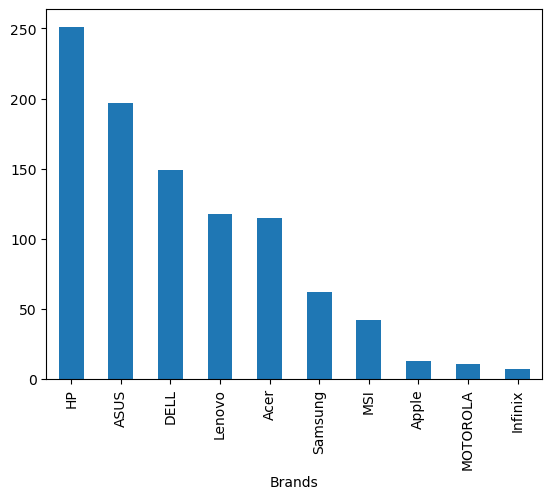

In [48]:
df["Brands"].value_counts().head(10).plot(kind="bar")
plt.show()

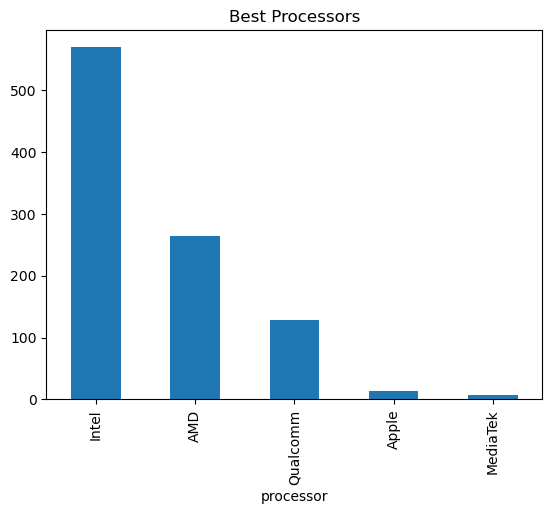

In [50]:
df["processor"].value_counts().head(5).plot(kind="bar")
plt.title("Best Processors")
plt.show()

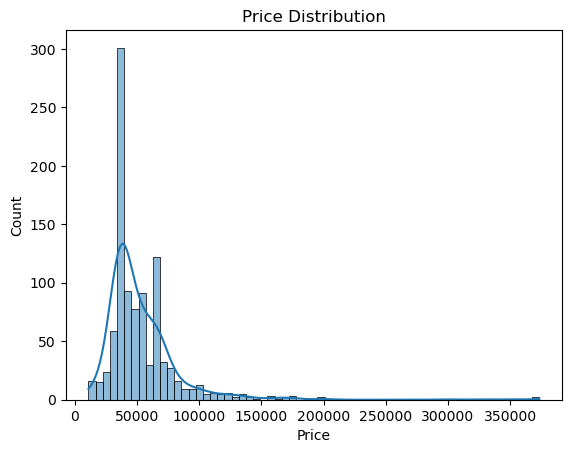

In [55]:
sns.histplot(x=df["Price"],kde=True)
plt.title("Price Distribution")
plt.show()